In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

A. Problem Understanding

When it comes to efficient building design, the computation of the heating load (HL) and the cooling load (CL) is required to determine the specifications of the heating and cooling equipment needed to maintain comfortable indoor air conditions. In order to estimate the required cooling and heating capacities, architects and building desioners need information about the characteristics of the building and of the conditioned space (for example occupancy and activity level). For this reason, we will investigate the effect of eight input variables: (RC), surface area, wall area, roof area, overall height, orientation, glazing area, and glazing area distribution, to determine the output variables HL and CL of residential buildings.

To evaluate our model performance we will use R squared (R2 score). R-squared is a statistical measure of how close the data are to the fitted regression line. This is very important to create predictions that are close to the real values. In this case we want to achieve a high R squared, the higher the R squared, the better the model fits the data.


B. Data Understanding

We perform energy analysis using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Specifically:

X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load
y2 Cooling Load

In [14]:
df = pd.read_excel(r'C:\Users\admin\Downloads\BUILDING DATASET\ENB2012_data.xlsx')

In [15]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


1. There arent many outliers, as the distance between 75th percentile and max is very less.

In [16]:
df.shape

(768, 10)

The dataset is highly imbalanced, with number 15 at 84 repetation and number 43 at only 1.

AxesSubplot(0.125,0.125;0.62x0.755)


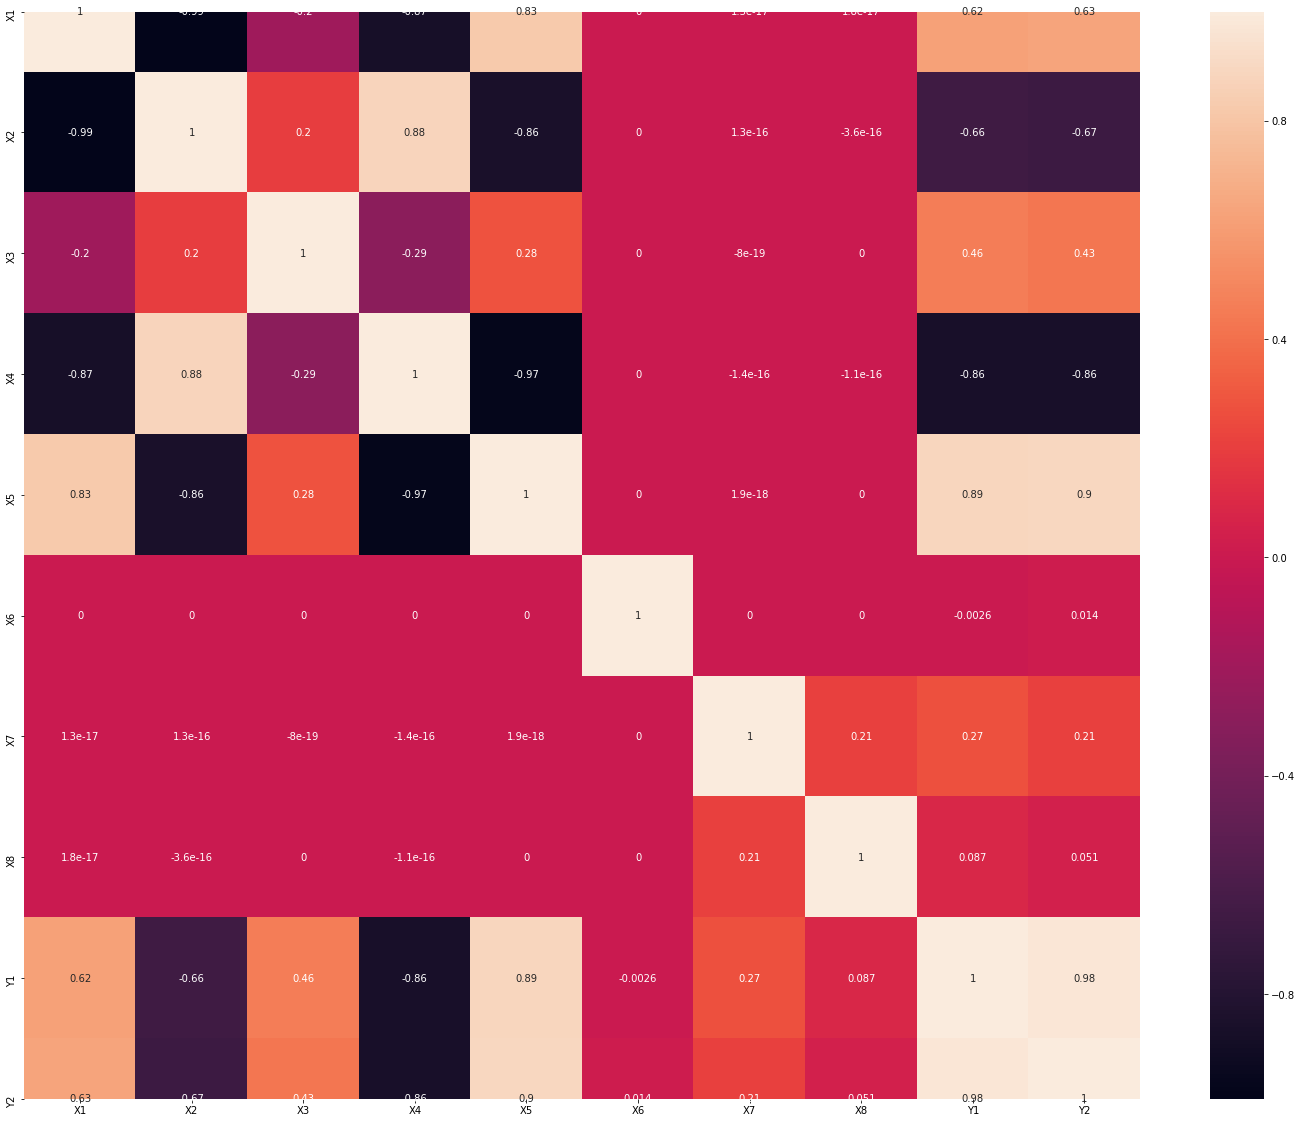

In [17]:
fig, ax = plt.subplots(figsize=(25,20))
axx=sns.heatmap(df.corr(), annot=True,ax=ax)
print(axx)

1. X5 contribute a lot to target features Y1 and Y2.

In [18]:
Y1 = df['Y1']
Y2 = df['Y2']
X = df.drop(['Y1','Y2'], axis=1)

In [19]:
X_train,X_test, y1_train, y1_test,y2_train, y2_test  = train_test_split(X, Y1,Y2,random_state=15)
Mim = MinMaxScaler()
X_train = Mim.fit_transform(X_train)
X_test = Mim.transform(X_test)
scores = {}

C:\Python\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Using MLPRegressor

In [20]:
from sklearn.neural_network import MLPRegressor

mlpreg = MLPRegressor(hidden_layer_sizes = [100,50,20],activation ='relu', solver='adam',max_iter = 10000,random_state = 0).fit(X_train, y1_train)
print("For Y1 feature : \ntrain r2 score: {} \ntest r2 score: {}".format(mlpreg.score(X_train, y1_train),mlpreg.score(X_test, y1_test)))
scores['MLPRegressor'] = {'Y1 Train':mlpreg.score(X_train, y1_train), 'Y1 Test':mlpreg.score(X_test, y1_test) }
mlpreg2 = MLPRegressor(hidden_layer_sizes = [100,50,20],activation ='relu', solver='adam',max_iter = 10000,random_state = 0).fit(X_train, y2_train)
print("For Y2 feature: \ntrain r2 score: {} \ntest r2 score: {}".format(mlpreg2.score(X_train, y2_train),mlpreg2.score(X_test, y2_test)))
scores['MLPRegressor'].update({'Y2 Train':mlpreg2.score(X_train, y2_train), 'Y2 Test':mlpreg2.score(X_test, y2_test)})

For Y1 feature : 
train r2 score: 0.99658832418311 
test r2 score: 0.9959931574338358
For Y2 feature: 
train r2 score: 0.9867595649286867 
test r2 score: 0.9815515557199613


In [21]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(8, input_dim=8, kernel_initializer = 'normal',activation='relu'))
model.add(Dense(4, kernel_initializer = 'normal',activation='relu'))
model.add(Dense(1, kernel_initializer = 'normal'))


model.compile(loss='mse', optimizer='adam', metrics=['mse'])


model.fit(X_train, y1_train, epochs=150, batch_size=20)
y1_train_predict = model.predict(X_train)
y1_test_predict = model.predict(X_test)


model.fit(X_train, y2_train, epochs=150, batch_size=20)
y2_train_predict = model.predict(X_train)
y2_test_predict = model.predict(X_test)

Epoch 1/150
576/576 [==============================] - 0s 776us/step - loss: 581.7727 - mean_squared_error: 581.7727
Epoch 2/150
576/576 [==============================] - 0s 42us/step - loss: 579.7769 - mean_squared_error: 579.7769
Epoch 3/150
576/576 [==============================] - 0s 50us/step - loss: 576.0198 - mean_squared_error: 576.0198
Epoch 4/150
576/576 [==============================] - 0s 52us/step - loss: 568.6918 - mean_squared_error: 568.6918
Epoch 5/150
576/576 [==============================] - 0s 47us/step - loss: 555.7803 - mean_squared_error: 555.7803
Epoch 6/150
576/576 [==============================] - 0s 43us/step - loss: 533.8074 - mean_squared_error: 533.8074
Epoch 7/150
576/576 [==============================] - 0s 52us/step - loss: 499.0734 - mean_squared_error: 499.0734
Epoch 8/150
576/576 [==============================] - 0s 42us/step - loss: 449.3148 - mean_squared_error: 449.3148
Epoch 9/150
576/576 [==============================] - 0s 47us/step - l

576/576 [==============================] - 0s 43us/step - loss: 10.8583 - mean_squared_error: 10.8583
Epoch 73/150
576/576 [==============================] - 0s 42us/step - loss: 10.7755 - mean_squared_error: 10.7755
Epoch 74/150
576/576 [==============================] - 0s 47us/step - loss: 10.7255 - mean_squared_error: 10.7255
Epoch 75/150
576/576 [==============================] - 0s 42us/step - loss: 10.7120 - mean_squared_error: 10.7120
Epoch 76/150
576/576 [==============================] - 0s 45us/step - loss: 10.5951 - mean_squared_error: 10.5951
Epoch 77/150
576/576 [==============================] - 0s 38us/step - loss: 10.5451 - mean_squared_error: 10.5451
Epoch 78/150
576/576 [==============================] - 0s 43us/step - loss: 10.5119 - mean_squared_error: 10.5119
Epoch 79/150
576/576 [==============================] - 0s 42us/step - loss: 10.4820 - mean_squared_error: 10.4820
Epoch 80/150
576/576 [==============================] - 0s 45us/step - loss: 10.4117 - mean_s

576/576 [==============================] - 0s 47us/step - loss: 9.4888 - mean_squared_error: 9.4888
Epoch 144/150
576/576 [==============================] - 0s 57us/step - loss: 9.4486 - mean_squared_error: 9.4486
Epoch 145/150
576/576 [==============================] - 0s 45us/step - loss: 9.4627 - mean_squared_error: 9.4627
Epoch 146/150
576/576 [==============================] - 0s 47us/step - loss: 9.4351 - mean_squared_error: 9.4351
Epoch 147/150
576/576 [==============================] - 0s 54us/step - loss: 9.4308 - mean_squared_error: 9.4308
Epoch 148/150
576/576 [==============================] - 0s 40us/step - loss: 9.4308 - mean_squared_error: 9.4308
Epoch 149/150
576/576 [==============================] - 0s 45us/step - loss: 9.4359 - mean_squared_error: 9.4359
Epoch 150/150
576/576 [==============================] - 0s 50us/step - loss: 9.4280 - mean_squared_error: 9.4280
Epoch 1/150
576/576 [==============================] - 0s 45us/step - loss: 13.7739 - mean_squared_err

576/576 [==============================] - 0s 52us/step - loss: 9.9893 - mean_squared_error: 9.9893
Epoch 65/150
576/576 [==============================] - 0s 52us/step - loss: 9.9628 - mean_squared_error: 9.9628
Epoch 66/150
576/576 [==============================] - 0s 54us/step - loss: 9.9315 - mean_squared_error: 9.9315
Epoch 67/150
576/576 [==============================] - 0s 54us/step - loss: 9.9678 - mean_squared_error: 9.9678
Epoch 68/150
576/576 [==============================] - 0s 57us/step - loss: 9.9603 - mean_squared_error: 9.9603
Epoch 69/150
576/576 [==============================] - 0s 62us/step - loss: 9.9568 - mean_squared_error: 9.9568
Epoch 70/150
576/576 [==============================] - 0s 50us/step - loss: 9.9508 - mean_squared_error: 9.9508
Epoch 71/150
576/576 [==============================] - 0s 56us/step - loss: 9.9086 - mean_squared_error: 9.9086
Epoch 72/150
576/576 [==============================] - 0s 47us/step - loss: 9.9428 - mean_squared_error: 9.9

576/576 [==============================] - 0s 75us/step - loss: 9.6723 - mean_squared_error: 9.6723
Epoch 136/150
576/576 [==============================] - 0s 90us/step - loss: 9.6859 - mean_squared_error: 9.6859
Epoch 137/150
576/576 [==============================] - 0s 80us/step - loss: 9.6980 - mean_squared_error: 9.6980
Epoch 138/150
576/576 [==============================] - 0s 54us/step - loss: 9.6548 - mean_squared_error: 9.6548
Epoch 139/150
576/576 [==============================] - 0s 50us/step - loss: 9.6745 - mean_squared_error: 9.6745
Epoch 140/150
576/576 [==============================] - 0s 52us/step - loss: 9.6791 - mean_squared_error: 9.6791
Epoch 141/150
576/576 [==============================] - ETA: 0s - loss: 5.3289 - mean_squared_error: 5.32 - 0s 50us/step - loss: 9.6716 - mean_squared_error: 9.6716
Epoch 142/150
576/576 [==============================] - 0s 49us/step - loss: 9.6504 - mean_squared_error: 9.6504
Epoch 143/150
576/576 [===========================

### evaluation of Keras

In [30]:
from sklearn.metrics import r2_score
print("Y1: \nTrain r2 score is--:{:.2f} \nTest r2 score is--:{:.2f}".format(r2_score(y1_train, y1_train_predict),r2_score(y1_test, y1_test_predict)))
print("Y2: \nTrain r2 score is--:{:.2f} \nTest r2 score is--:{:.2f}".format(r2_score(y2_train, y2_train_predict),r2_score(y2_test, y2_test_predict)))
scores['keras'] = {'Y1 Train':r2_score(y1_train, y1_train_predict), 'Y1 Test':r2_score(y1_test, y1_test_predict),
                  'Y2 Train':r2_score(y2_train, y2_train_predict),'Y2 Test':r2_score(y2_test, y2_test_predict)}

Y1: 
Train r2 score is--:0.91 
Test r2 score is--:0.90
Y2: 
Train r2 score is--:0.89 
Test r2 score is--:0.85


### Applying LinearRegression

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y1_train)
print("Y1: \ntrain r2 score: {} \ntest r2 score: {}".format(lr.score(X_train, y1_train),lr.score(X_test, y1_test)))
scores['LinearRegression'] = {'Y1 Train':lr.score(X_train, y1_train), 'Y1 Test':lr.score(X_test, y1_test)}

lr = LinearRegression().fit(X_train, y2_train)
print("Y2: \ntrain r2 score: {} \ntest r2 score: {}".format(lr.score(X_train, y2_train),lr.score(X_test, y2_test)))
scores['LinearRegression'].update({'Y2 Train':lr.score(X_train, y1_train),'Y2 Test':lr.score(X_test, y1_test)})

Y1: 
train r2 score: 0.9182340134649458 
test r2 score: 0.9085377227857345
Y2: 
train r2 score: 0.8965794204306985 
test r2 score: 0.8597045593696288


### Applying RandomForestRegressor

In [25]:
# 
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor().fit(X_train, y1_train)
print("Y1: \ntrain r2 scores: {} \ntest r2 scores: {}".format(forest.score(X_train, y1_train),forest.score(X_test, y1_test)))
scores['RandomForestRegressor'] = {'Y1 Train':forest.score(X_train, y1_train),'Y1 Test':forest.score(X_test, y1_test)}

forest = RandomForestRegressor().fit(X_train, y2_train)
print("Y2: \ntrain r2 scores: {} \ntest r2 scores: {}".format(forest.score(X_train, y2_train),forest.score(X_test, y2_test)))
scores['RandomForestRegressor'].update({'Y2 Train':forest.score(X_train, y2_train),'Y2 Test':forest.score(X_test, y2_test)})

Y1: 
train r2 scores: 0.9994546319890045 
test r2 scores: 0.9975800188945538
Y2: 
train r2 scores: 0.9937033373441375 
test r2 scores: 0.9644244747708479


C:\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Python\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Applying AdaBoostRegressor

In [26]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor().fit(X_train, y1_train)
print("Y1: \ntrain r2 scores: {} \ntest r2 scores: {}".format(abr.score(X_train, y1_train),abr.score(X_test, y1_test)))
scores['AdaBoostRegressor'] = {'Y1 Train':abr.score(X_train, y1_train),'Y1 Test':abr.score(X_test, y1_test)}

abr = AdaBoostRegressor().fit(X_train, y2_train)
print("Y2: \ntrain r2 scores: {} \ntest r2 scores: {}".format(abr.score(X_train, y2_train),abr.score(X_test, y2_test)))
scores['AdaBoostRegressor'].update({'Y2 Train':abr.score(X_train, y2_train),'Y2 Test':abr.score(X_test, y2_test)})

Y1: 
train r2 scores: 0.9571427149587566 
test r2 scores: 0.9576906016844258
Y2: 
train r2 scores: 0.9361088567844115 
test r2 scores: 0.9363539352582372


In [27]:
pd.DataFrame(scores).T

,Y1 Test,Y1 Train,Y2 Test,Y2 Train
MLPRegressor,0.995993,0.996588,0.981552,0.986760
keras,0.895874,0.905789,0.851522,0.888084
Ridge,0.908526,0.918231,0.859720,0.896574
LinearRegression,0.908538,0.918234,0.866304,0.858863
RandomForestRegressor,0.997580,0.999455,0.964424,0.993703
AdaBoostRegressor,0.957691,0.957143,0.936354,0.936109


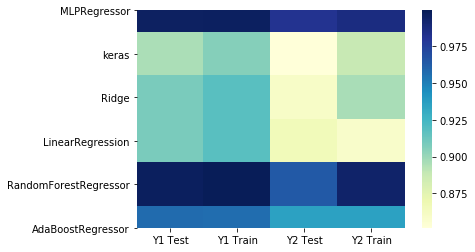

In [28]:
sns.heatmap(pd.DataFrame(scores).T,cmap="YlGnBu")

As we can see in the figure above, deeper color means higher r2 scores. Ensenble algorithms have better performance than base regression model, even without adjust parameters.